In [1]:
import ingestion
import people_library
import retrieval
import os
import pickle
import matplotlib.pyplot as plt
import math
import utils

/Users/adityapatil/GitHub/image-search/venvGlimpse/lib/python3.12/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Data Ingestion

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/Users/adityapatil/GitHub/image-search/venvGlimpse/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
100%|██████████| 441/441 [00:00<00:00, 603.79it/s]


img path index: 0


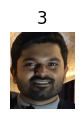

img path index: 1


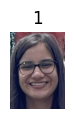

img path index: 2


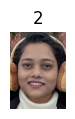

img path index: 3


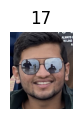

img path index: 4


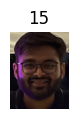

img path index: 5


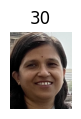

img path index: 6


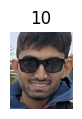

img path index: 7


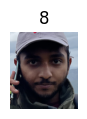

img path index: 8


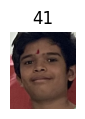

img path index: 9


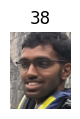

img path index: 10


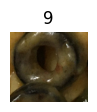

img path index: 11


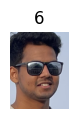

img path index: 12


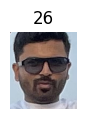

img path index: 13


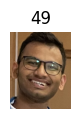

img path index: 14


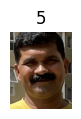

img path index: 15


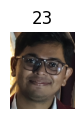

img path index: 16


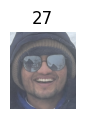

img path index: 17


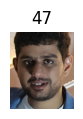

img path index: 18


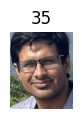

img path index: 19


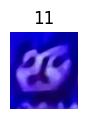

In [2]:
plist = ingestion.__main__()

In [3]:
# Name  and write faces here
people = people_library.PeopleLibrary()
people.rename_face(plist[0]['label'], 'Aditya')
people.rename_face(plist[1]['label'], 'Namita')
people.rename_face(plist[2]['label'], 'Shruti')
people.rename_face(plist[3]['label'], 'Yash')
people.rename_face(plist[4]['label'], 'Patel')
people.rename_face(plist[5]['label'], 'Aai')
people.rename_face(plist[6]['label'], 'Jinay')
people.rename_face(plist[7]['label'], 'Shantanu')
people.rename_face(plist[8]['label'], 'Dhruv')
people.rename_face(plist[9]['label'], 'Kamlesh')
people.rename_face(plist[12]['label'], 'Aditya')
people.rename_face(plist[13]['label'], 'Shubham')

# adding names to faces
people.write_out()


## Search

Starting Duckling server on port 8010...
Duckling server ready in 0.0 seconds
[255 154  91 188 169 288 294 362 162 145]


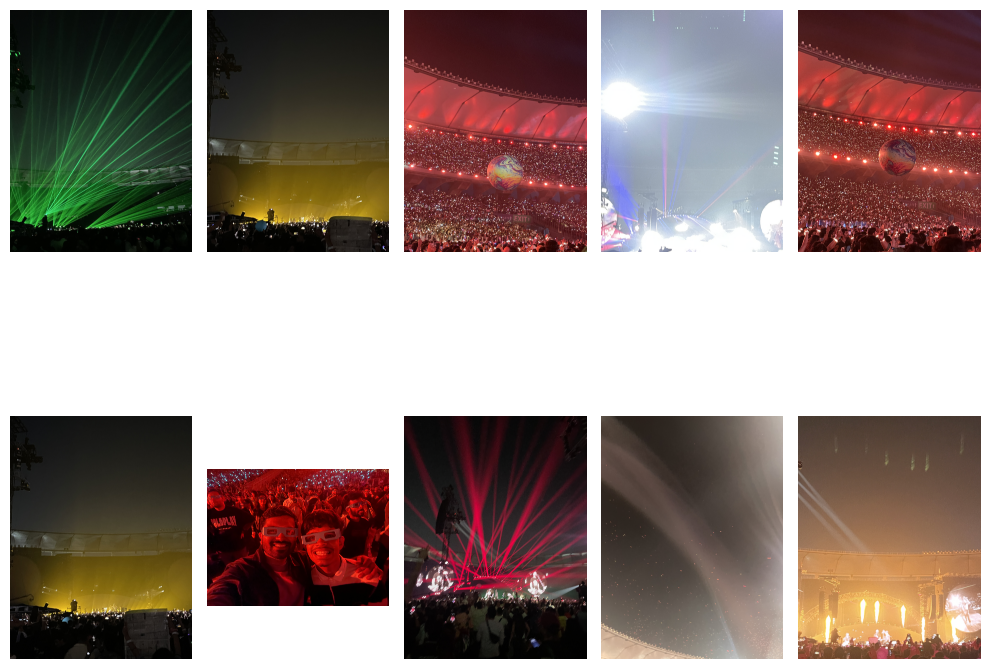

In [7]:
# Retrieval and plot

img_indices = retrieval.__main__(query="republic day 2025")
print(img_indices)

embed_dir = 'embed_store'
img_path_index = pickle.load(open(os.path.join(embed_dir, 'img_path_index.pkl'), 'rb'))

filtered_images = [img_path_index[idx] for idx in img_indices if idx != -1]

# print(filtered_images)
# display
num_images = len(filtered_images)
rows = math.ceil(num_images / 5)

fig, axes = plt.subplots(rows, 5, figsize=(10, 5 * rows))
if rows == 1:
    axes = [axes] # Handle the case where there's only one row

for i, img_path in enumerate(filtered_images):
    row = i // 5
    col = i % 5
    img = utils.get_and_orient_image(img_path)
    axes[row][col].imshow(img)
    axes[row][col].axis('off')

# Hide any unused subplots in the last row
if num_images % 5 != 0:
    num_empty = 5 - (num_images % 5)
    for i in range(num_empty):
        fig.delaxes(axes[-1][-1 - i])

plt.tight_layout()
plt.show()

In [2]:
import datetime
import numpy as np
import os 

embed_dir = 'embed_store'
dates = [date for date in np.load(os.path.join(embed_dir, 'datetime_metadata.npy'), allow_pickle=True) if date is not None]

print(dates)

[np.str_('2025-06-18T08:41:43+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:45:43+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:41:43+05:30'), np.str_('2025-06-18T08:40:54+05:30'), np.str_('2025-06-18T08:45:43+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:41:43+05:30'), np.str_('2025-06-18T08:40:32+05:30'), np.str_('2025-06-18T08:45:43+05:30'), np.str_('2025-06-18T08:40:32+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:41:43+05:30'), np.str_('2025-06-18T08:41:43+05:30'), np.str_('2025-06-18T08:40:32+05:30'), np.str_('2025-06-18T08:41:43+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:40:32+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:45:43+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:40:00+05:30'), np.str_('2025-06-18T08:41:43+05:30'), np.str_('20